In [1]:
import glob
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline

plt.style.use('seaborn-white')
cmap = plt.cm.get_cmap('tab10')

PATH = '../noisy_label/last_checkpoints/'
END = '*acc.txt'

datasets = ['cifar10_', 'cifar100_']
noisy_ratios = ['0.2', '0.5', '0.8', '0.9']
columns = ['Training', 'Accuracy']

# datasets = ["*" + dataset + "*" for dataset in datasets]
# noisy_ratios = ["*" + noisy_ratio + "*" for noisy_ratio in noisy_ratios]

all_files = glob.glob(PATH + "*acc.txt")
all_files

method_dict = {'base_' : 'Cross Entropy',
               'ce_ent_' : 'Cross Entropy / Entropy',
               'kld_' : 'Cross Entropy / KLD',
               'ce_kg_' : 'Graph Rejection',
               'random_mix_' : 'RandomMix',
               'dividehmm_' : "DivideHMM",
              }

# set colors for each cat
fullnames = [val for key, val in method_dict.items()]
keywords = [key for key, val in method_dict.items()]
color_dict = {}
for i in range(len(fullnames)):
    color_dict[fullnames[i]] = cmap(i)

# load and preprocess data
def get_data(path, columns=['Training', 'Accuracy']):
    result = pd.read_csv(path, sep='  ', names=columns, engine='python')
    result[columns[0]] = result[columns[0]].str.replace('Epoch:', '').astype(int)
    result[columns[1]] = result[columns[1]].str.replace('Accuracy:', '').astype(float)
    return result

*cifar10_*


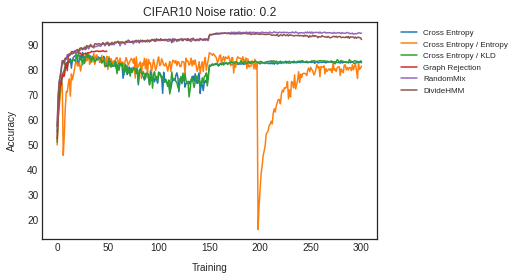

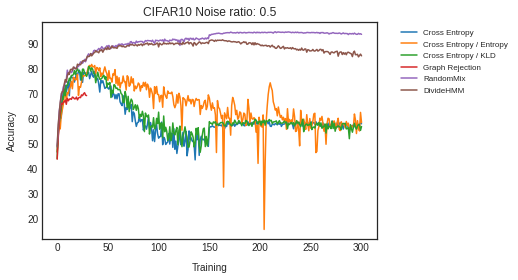

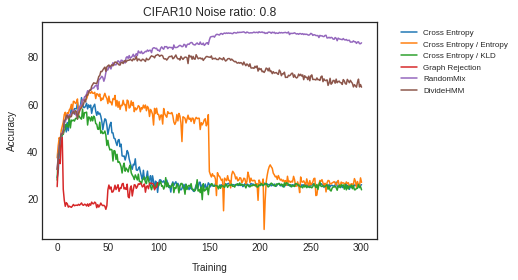

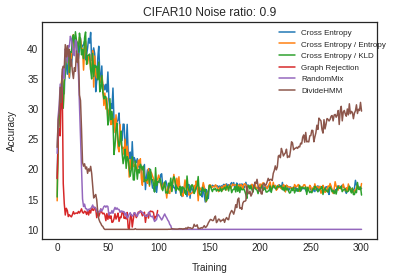

*cifar100_*


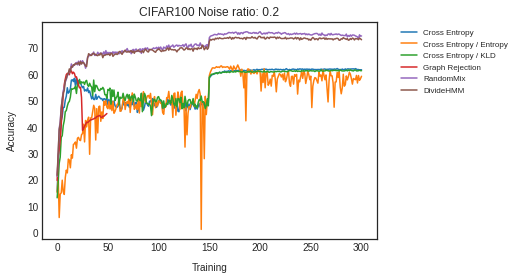

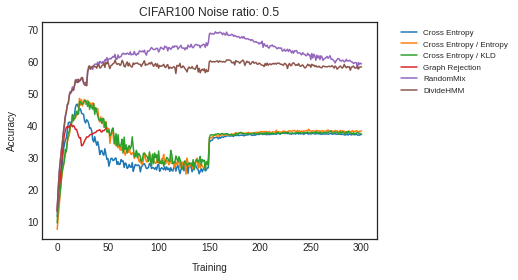

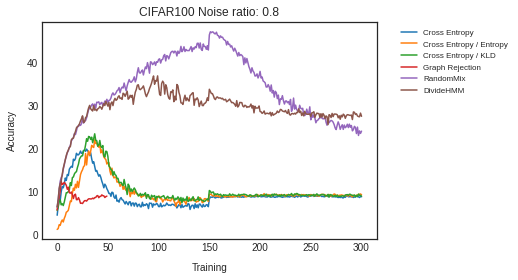

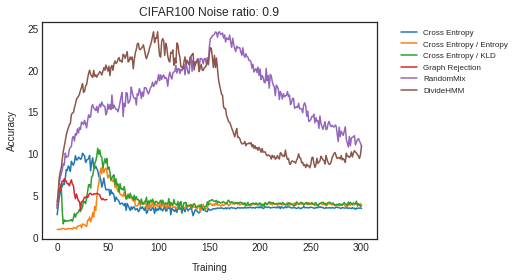

In [6]:
# Generate individual plots
for dataset in ["*" + dataset + "*" for dataset in datasets]:
    print(dataset)

    for noisy_ratio in ["*" + noisy_ratio + "*" for noisy_ratio in noisy_ratios]:
        files = []
        for names in keywords:
            files.extend(glob.glob(PATH + "*" + names + "*" + dataset + noisy_ratio + END))
            
        # plot line graph
        fig = plt.figure()
        ax = plt.axes()
        
        for file in files:
            result = get_data(file)
            method_name = [val for key, val in method_dict.items() if key in file]
            method_name = method_name[0]
                
            ax.plot(columns[0], columns[1], data=result, label=method_name, color=color_dict[method_name])
        
        ax.set_xlabel(columns[0], labelpad=10)
        ax.set_ylabel(columns[1], labelpad=10)
        ax.legend(frameon=False, fontsize=8, bbox_to_anchor=(1.05, 1))
        plt.title((dataset.upper() + " Noise ratio: " + noisy_ratio).replace("_","").replace("*",""))
#         ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)
        
        plt.savefig(("accuracy_viz/individual_plots/" + dataset.replace('*', '') + noisy_ratio + '.png').replace('*', ''), dpi=300, transparent=False, bbox_inches='tight')
        plt.show()

*cifar10_*


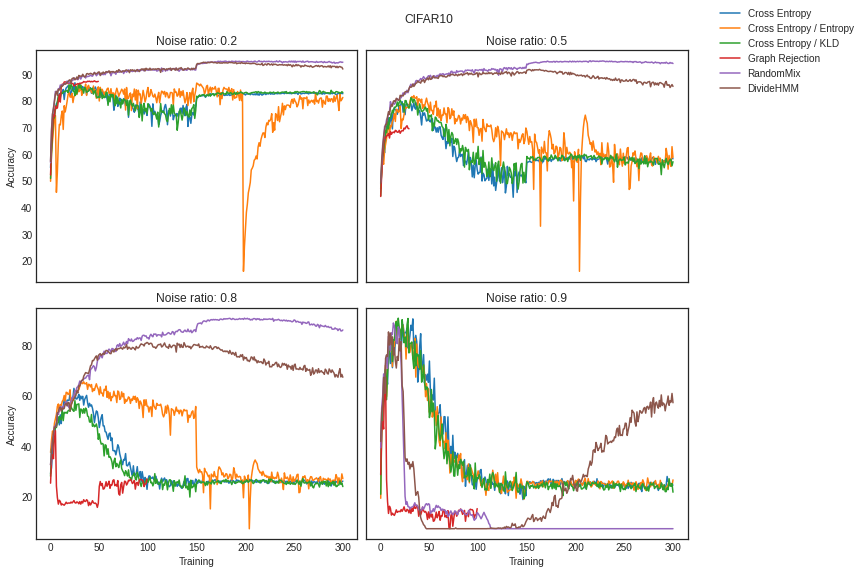

*cifar100_*


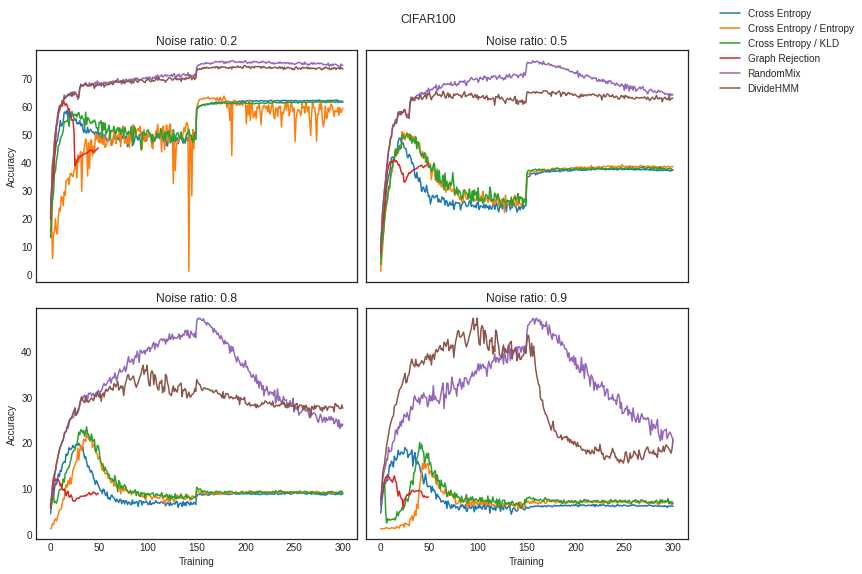

In [5]:
# Generate multiplots
for dataset in ["*" + dataset + "*" for dataset in datasets]:
    print(dataset)
    
    # plot line graph
    rows = 2
    cols = 2
    fig, axs = plt.subplots(rows, cols, figsize=(12,8))

    for enum, noisy_ratio in enumerate(["*" + noisy_ratio + "*" for noisy_ratio in noisy_ratios]):
        row = enum % cols
        col = math.floor(enum / cols)

        files = []
        for names in keywords:
            files.extend(glob.glob(PATH + "*" + names + "*" + dataset + noisy_ratio + END))

        for file in files:
            result = get_data(file)
            
            method_name = [val for key, val in method_dict.items() if key in file]
            method_name = method_name[0]
                
            axs[col, row].plot(columns[0], columns[1], data=result, label=method_name, color=color_dict[method_name])
            axs[col, row].set_title(("Noise ratio: " + noisy_ratio).replace("*",""))
            
        for ax in axs.flat:
            ax.set(xlabel=columns[0], ylabel=columns[1])
            # Hide x labels and tick labels for top plots and y ticks for right plots.
            ax.label_outer()
            

            
    fig.suptitle((dataset.upper()).replace("_","").replace("*",""))

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    fig.tight_layout()
    
    plt.subplots_adjust(right=0.8)
    
    plt.savefig(("accuracy_viz/" + dataset.replace("_","").replace('*', '') + '.png'), dpi=300, transparent=False, bbox_inches='tight', facecolor='white')
    plt.show()